/home/hmcgrat/miniconda3/envs/LNC_ENV/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


(0.0, 1.0)

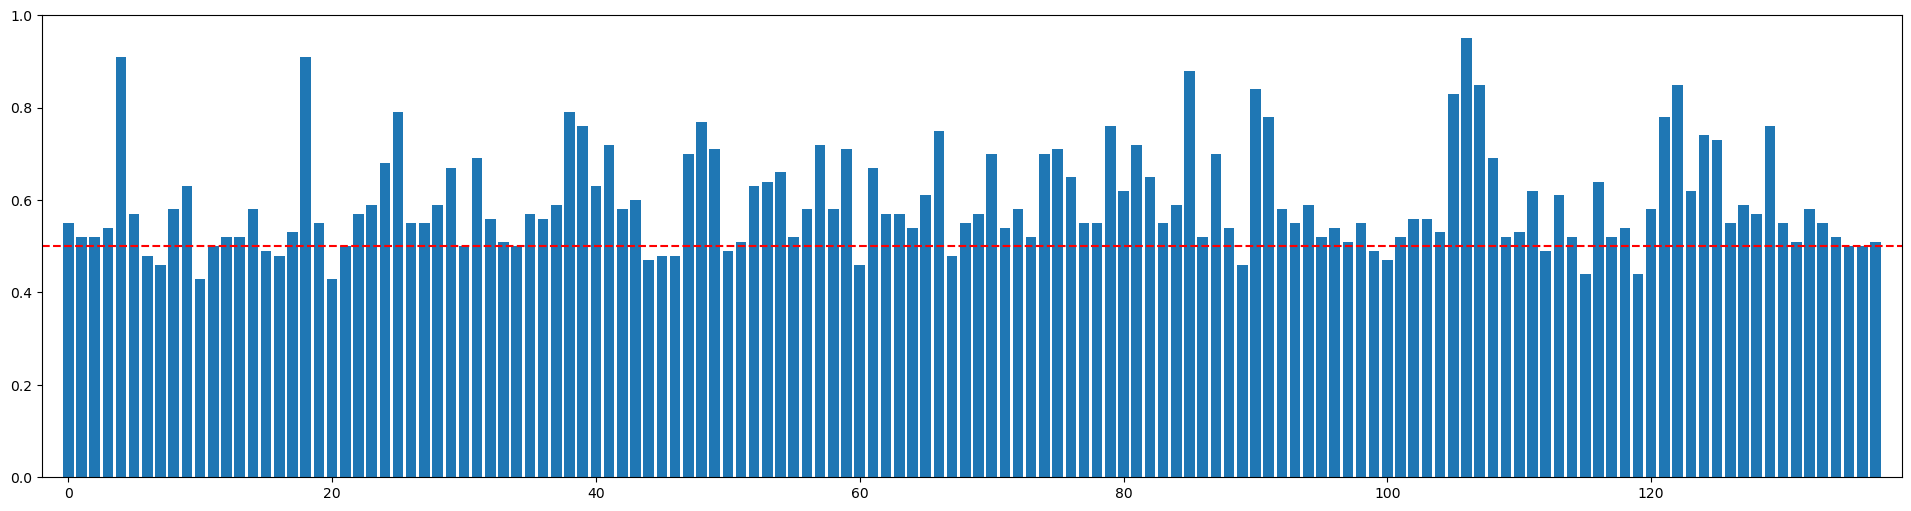

In [1]:
import shared_data as sd
from glob import glob
import utility_functions as uf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


RESULTS = sd.RESULTS
result_paths = glob(f"{RESULTS}/*validation*")
data = []
for result_path in result_paths:
    cf = uf.get_config_file_from_file_path(result_path, type_of_file="result")
    grid_point = cf.sel_name.split("_")[-1].split(":")
    grid_point = list(map(int, grid_point))
    accuracy_mean, accuracy_sem = uf.get_accuracy_mean_and_sem(result_path)
    accuracy_sd = accuracy_sem * np.sqrt(sd.N_CROSS_VALIDATION_COMBINATIONS)
    data.append({
        "x": grid_point[0],
        "y": grid_point[1],
        "z": grid_point[2],
        "accuracy_mean": round(accuracy_mean, 2),
        "accuracy_sem": round(accuracy_sem, 2),
        "accuracy_sd": round(accuracy_sd, 2),
        "config_index": cf.config_index
    })
df = pd.DataFrame(data)
plt.figure(figsize=(24, 6))
plt.bar(df["config_index"], df["accuracy_mean"])
plt.plot([df["config_index"].min()-2, df["config_index"].max()+2], [0.5, 0.5], color="red", linestyle="--")
plt.xlim((df["config_index"].min()-2, df["config_index"].max()+2))
plt.ylim((0, 1))